In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
city_data_load = 'city_data.csv'
ride_data_load = 'ride_data.csv'

city_data = pd.read_csv(city_data_load)
ride_data = pd.read_csv(ride_data_load)

In [38]:
data = pd.merge(ride_data, city_data, how = 'left', on = ['city','city'])
data.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [39]:
urban = data[data['type'] == 'Urban']
urban_ride_count = urban.groupby(['city']).count()['ride_id']
urban_avg_fare = urban.groupby(['city']).mean()['fare']
urban_driver_count = urban.groupby(['city']).count()['driver_count']

In [40]:
suburban = data[data['type'] == 'Suburban']
suburban_ride_count = suburban.groupby(['city']).count()['ride_id']
suburban_avg_fare = suburban.groupby(['city']).mean()['fare']
suburban_driver_count = suburban.groupby(['city']).count()['driver_count']

In [41]:
rural = data[data['type'] == 'Rural']
rural_ride_count = rural.groupby(['city']).count()['ride_id']
rural_avg_fare = rural.groupby(['city']).mean()['fare']
rural_driver_count = rural.groupby(['city']).count()['driver_count']

# Bubble Plot

In [42]:
plt.scatter(urban_ride_count, urban_avg_fare, 
            s = 10*urban_driver_count, c="lightcoral",
            edgecolor="black", linewidths = 1, marker = "o", alpha = 0.8, label = "Urban")

In [43]:
plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s = 10*suburban_driver_count, c="skyblue",
            edgecolor="black", linewidths = 1, marker = "o", alpha = 0.8, label = "Suburban")

In [44]:
plt.scatter(rural_ride_count, rural_avg_fare, 
            s = 10*rural_driver_count, c="gold",
            edgecolor="black", linewidths = 1, marker = "o", alpha = 0.8, label = "Rural")

In [45]:
plt.title('2016 Pyber Ride Sharing Data')
plt.ylabel('Average Fare in US Dollar')
plt.xlabel('Total Ride Count per City')
plt.xlim((0,50))
plt.grid(True)
plt.text(55, 45, "Note:\nCircle size correlates \nwith driver count per city.")

Text(55,45,'Note:\nCircle size correlates \nwith driver count per city.')

In [46]:
lgnd = plt.legend(fontsize="small", mode="Expanded", numpoints=1, scatterpoints=1,loc="best", title="City Types", labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

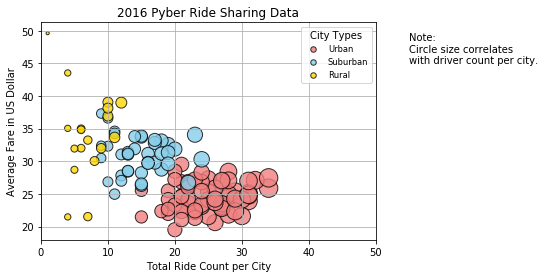

In [47]:
plt.show()

# Pie Chart - Total Fare

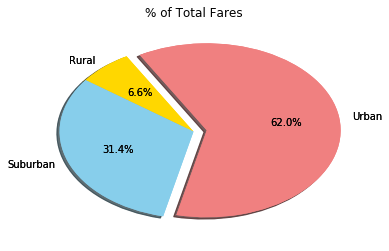

In [65]:
city_percent = 100 * data.groupby(['type']).sum()['fare'] \
            / data['fare'].sum()

plt.pie(city_percent, 
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "skyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=120)

plt.title("% of Total Fares")
plt.show()

# Pie Chart - Total Rides

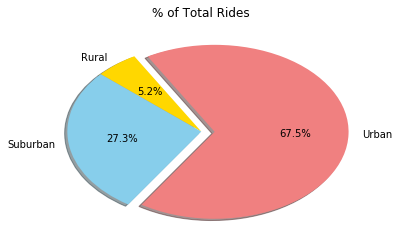

In [70]:
ride_percent = 100 * data.groupby(['type']).count()['ride_id'] \
            / data['ride_id'].count()

plt.pie(ride_percent, 
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "skyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=120)

plt.title("% of Total Rides")
plt.show()

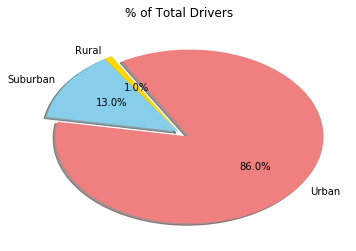

In [71]:
driver_percent = 100 * data.groupby(['type']).sum()['driver_count'] \
            / data['driver_count'].sum()

plt.pie(driver_percent, 
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "skyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=120)

plt.title("% of Total Drivers")
plt.show()